In [1]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [13]:
ALPHABETS_PATH = '../data/raw/alphabets'

In [2]:
data_dict = pickle.load(open('../data/processed/data.pickle', 'rb'))

In [3]:
data = data_dict['data']
labels = data_dict['labels']

In [4]:
len(data), len(labels), len(data[0])

(3920, 3920, 42)

In [5]:
labels_array = np.asarray(labels)

In [6]:
max_len = max(len(seq) for seq in data)
sampled_data = [seq[:42] for seq in data]
data_array = np.asarray(sampled_data)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data_array, labels_array, test_size=0.2, shuffle=True, stratify=labels)

In [8]:
model = RandomForestClassifier()

In [9]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
y_predict = model.predict(x_test)

In [11]:
score = accuracy_score(y_predict, y_test)
print('{}% of samples were classified correctly !'.format(score * 100))

88.13775510204081% of samples were classified correctly !


In [21]:
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

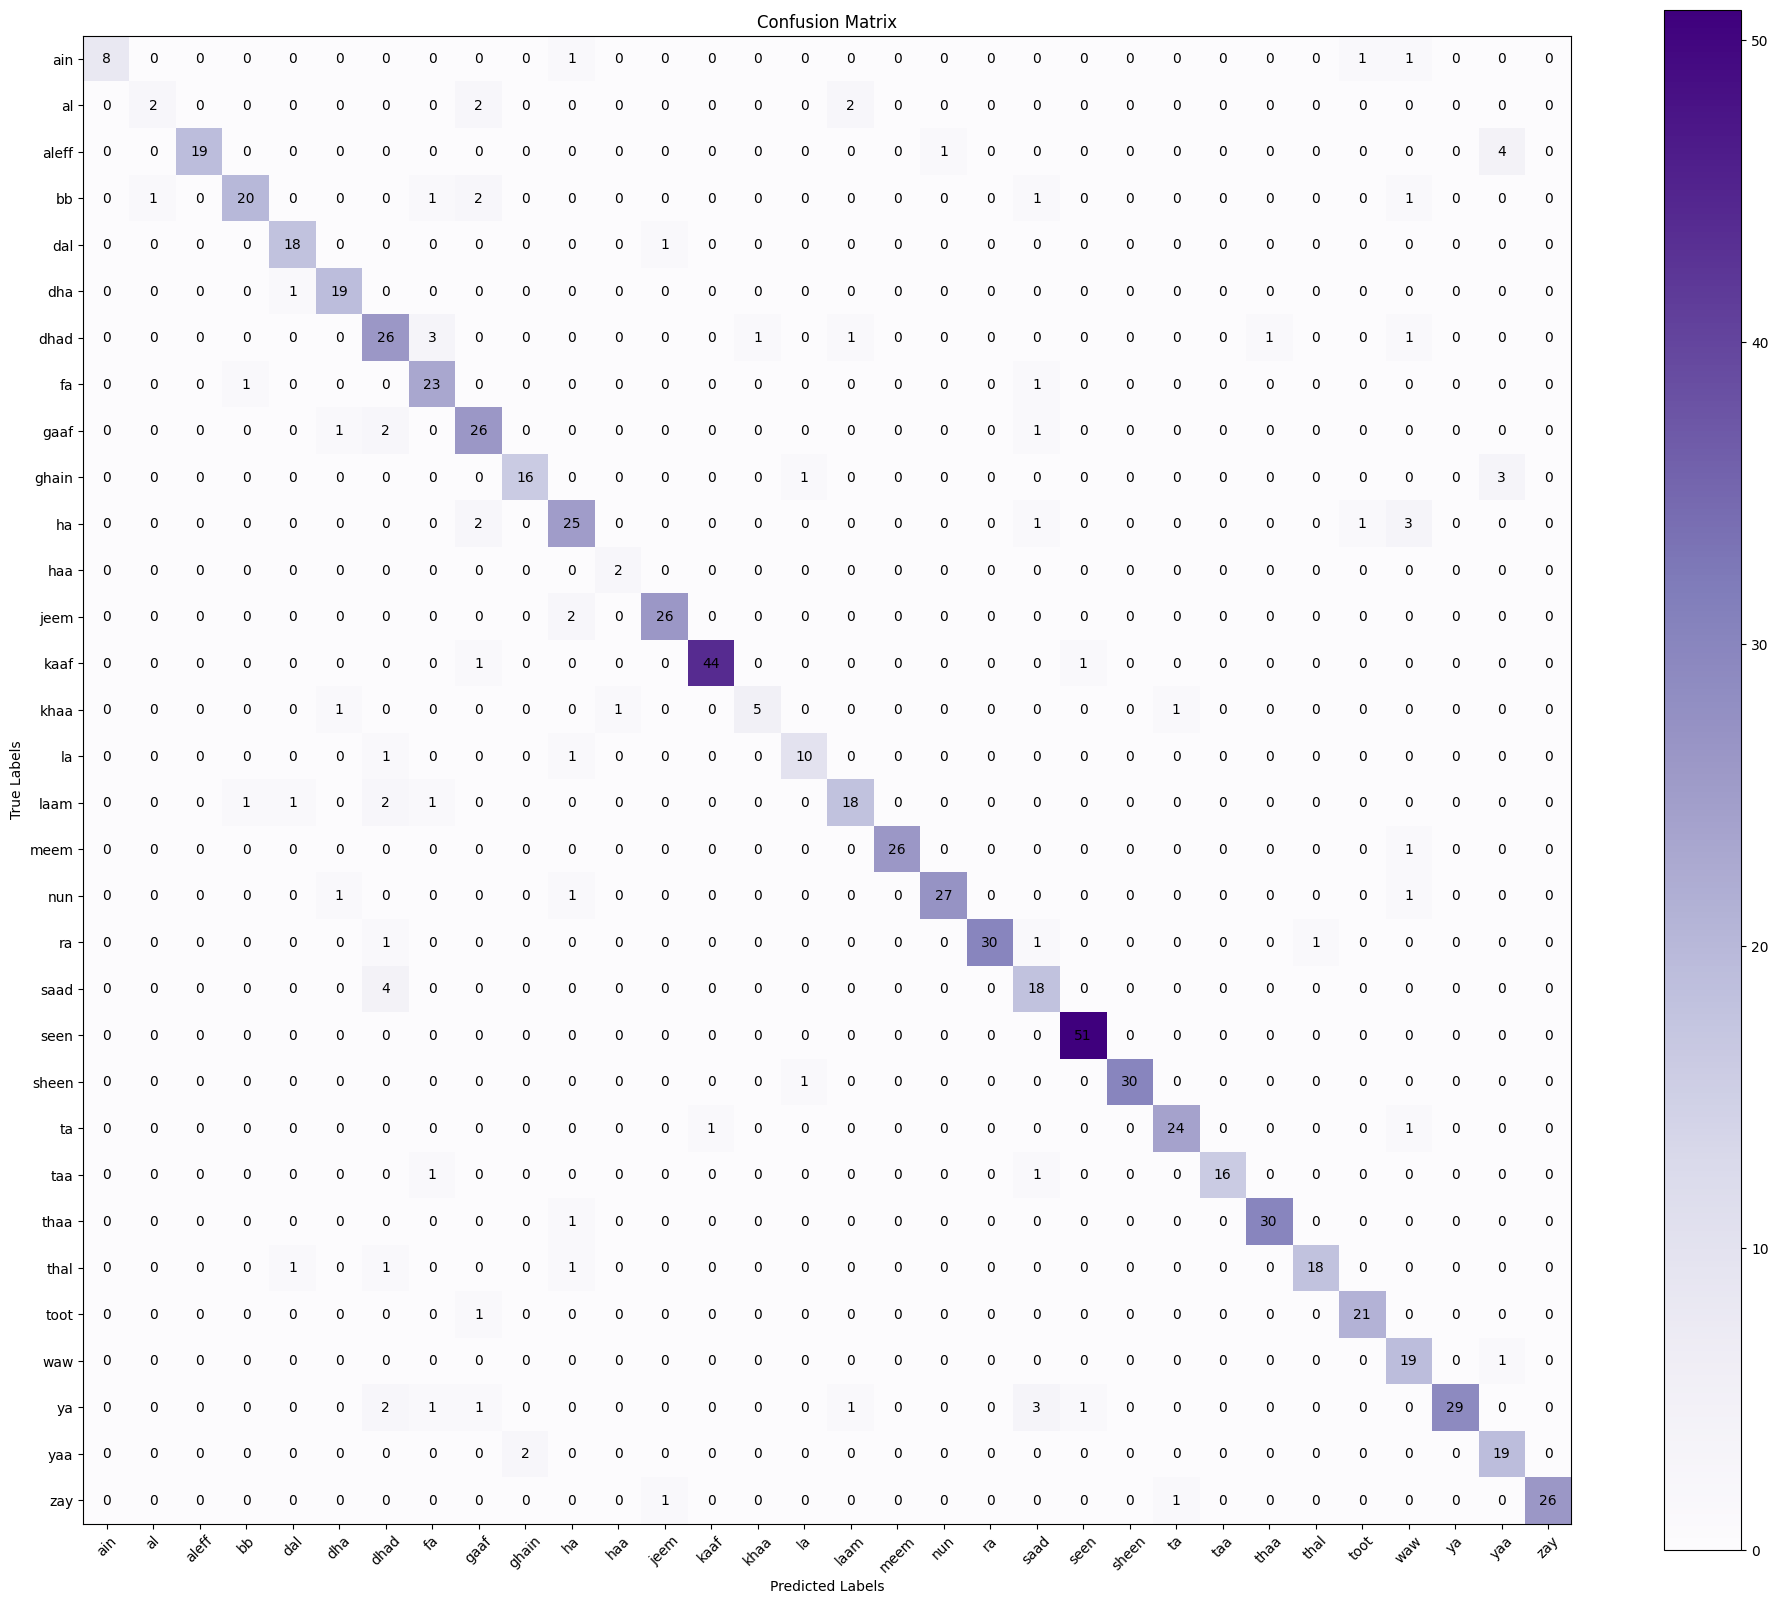

In [22]:
folders = os.listdir(ALPHABETS_PATH)

# Assuming y_test, y_predict, and folders are already defined
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(24, 20))
ax = plt.subplot()

# Plot the confusion matrix
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.colorbar(im)

# Set the tick marks and labels
tick_marks = np.arange(len(folders))
plt.xticks(tick_marks, folders, rotation=45)
plt.yticks(tick_marks, folders)

# Add cell scores
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [12]:
labels_list = []
for label in labels:
    if label not in labels_list: labels_list.append(label)
print(len(labels_list))

32


In [13]:
labels_list

['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']

In [18]:
labels_dict = {
    'ain': 'ع',
    'al': 'ال',
    'aleff': 'ا',
    'bb': 'ب',
    'dal': 'د',
    'dha': 'ظ',
    'dhad': 'ض',
    'fa': 'ف',
    'gaaf': 'ڨ',  
    'ghain': 'غ',
    'ha': 'ه',
    'haa': 'ح',
    'jeem': 'ج',
    'kaaf': 'ك',
    'khaa': 'خ',
    'la': 'ل',
    'laam': 'ل',
    'meem': 'م',
    'nun': 'ن',
    'ra': 'ر',
    'saad': 'ص',
    'seen': 'س',
    'sheen': 'ش',
    'ta': 'ت',
    'taa': 'ط',
    'thaa': 'ث',
    'thal': 'ذ',
    'toot': 'ة', 
    'waw': 'و',
    'ya': 'ي',
    'yaa': 'ي',
    'zay': 'ز',
}

In [19]:
f = open('../model/model.pickle', 'wb')
pickle.dump({'model': model, 'labels_dict': labels_dict}, f)
f.close()